In [3]:
# will run for a few minutes on kaggle
!pip install odeformer --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 78.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.1/797.1 MB 2.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 5.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 8.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 2.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━

In [4]:
import odeformer
from odeformer.model import SymbolicTransformerRegressor

dstr = SymbolicTransformerRegressor(from_pretrained=True)
model_args = {'beam_size':50, 'beam_temperature':0.1}
dstr.set_model_args(model_args)

Downloading...
From (original): https://drive.google.com/uc?id=1L_UZ0qgrBVkRuhg5j3BQoGxlvMk_Pm1W
From (redirected): https://drive.google.com/uc?id=1L_UZ0qgrBVkRuhg5j3BQoGxlvMk_Pm1W&confirm=t&uuid=8f151c68-661b-4c89-b5a7-cc3c433a0728
To: /kaggle/working/odeformer.pt
100%|██████████| 465M/465M [00:03<00:00, 119MB/s]  


Loaded pretrained model


In [8]:
import numpy as np

# sample trajectory
times = np.linspace(0, 10, 25)
x = 2.3 * np.cos(times + 0.5)
y = 1.2 * np.sin(times + 0.1)
trajectory = np.stack([x, y], axis=1)  # (time, state) format

In [9]:
candidates = dstr.fit(times, trajectory)
dstr.print(n_predictions=1)
pred_trajectory = dstr.predict(times, trajectory[0])

# evaluating prediction using R2 score
from odeformer.metrics import r2_score
print("R2 Score:", r2_score(trajectory, pred_trajectory))

x_0' = -2.9690 * x_1 + -1.9456 * sin(-0.0544 + 0.6603 * x_1)
x_1' = 0.3243 * x_0
R2 Score: 0.3717304108110599


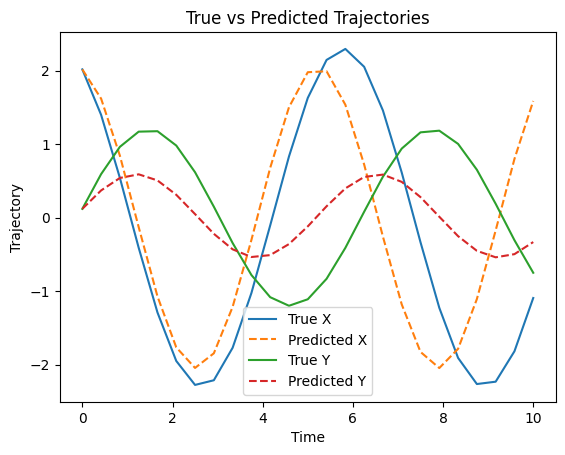

In [10]:
import matplotlib.pyplot as plt

plt.plot(times, trajectory[:, 0], label='True X')
plt.plot(times, pred_trajectory[:, 0], label='Predicted X', linestyle='--')
plt.plot(times, trajectory[:, 1], label='True Y')
plt.plot(times, pred_trajectory[:, 1], label='Predicted Y', linestyle='--')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Trajectory')
plt.title('True vs Predicted Trajectories')
plt.show()

## Trying on the Lotka-Volterra model

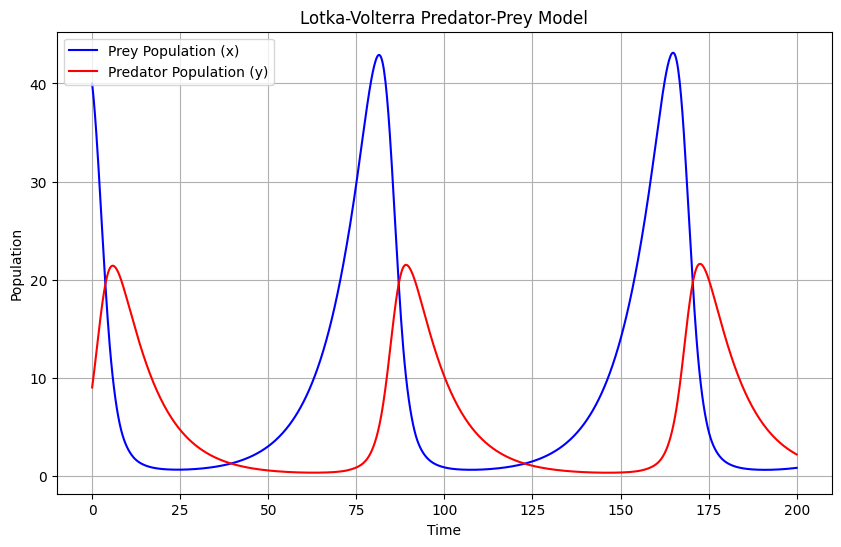

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Lotka-Volterra parameters
alpha = 0.1  # Prey birth rate
beta = 0.02  # Predation rate
delta = 0.01  # Predator reproduction rate
gamma = 0.1  # Predator death rate

# Defining the system of ODEs
def lotka_volterra(t, z):
    x, y = z
    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y
    return [dxdt, dydt]

# initial conditions
initial_conditions = [40, 9] # (with 40 prey and 9 predators)

# time span and points for the simulation
t_span = (0, 200)
t_points = np.linspace(0, 200, 1000)

solution = solve_ivp(lotka_volterra, t_span, initial_conditions, t_eval=t_points)

# extracting prey and predator populations over time
prey = solution.y[0]
predator = solution.y[1]
trajectory = np.stack([prey, predator], axis=1)

# plotting results
plt.figure(figsize=(10, 6))
plt.plot(t_points, prey, label='Prey Population (x)', color='blue')
plt.plot(t_points, predator, label='Predator Population (y)', color='red')
plt.title("Lotka-Volterra Predator-Prey Model")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.grid(True)
plt.show()

x_0' = 0.0929 * x_0 + -0.0159 * x_0 * x_1
x_1' = 0.0450 * x_1 * (-2.4950 + 0.2545 * x_0)


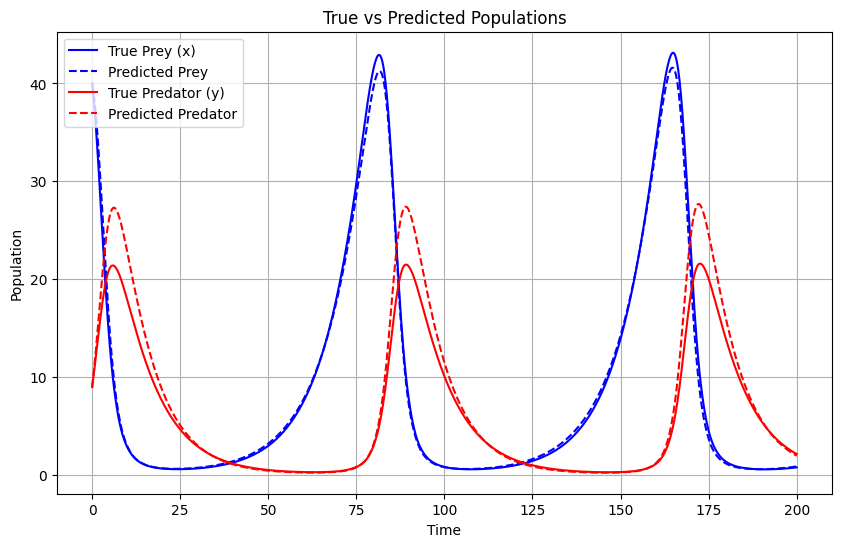

In [12]:
candidates = dstr.fit(t_points, trajectory)
dstr.print(n_predictions=1)
pred_trajectory = dstr.predict(t_points, trajectory[0])

plt.figure(figsize=(10, 6))
plt.plot(t_points, trajectory[:, 0], label='True Prey (x)', color='blue')
plt.plot(t_points, pred_trajectory[:, 0], label='Predicted Prey', linestyle='--', color='blue')
plt.plot(t_points, trajectory[:, 1], label='True Predator (y)', color='red')
plt.plot(t_points, pred_trajectory[:, 1], label='Predicted Predator', linestyle='--', color='red')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('True vs Predicted Populations')
plt.grid(True)
plt.show()

## Each layer shown separately

In [15]:
import torch

layer_outputs = {}

# Function to store the output of each layer
def hook_fn(module, input, output, layer_name):
    layer_outputs[layer_name] = output.detach().cpu()

# Registering hooks for layers in the encoder and decoder
def register_hooks(model_part, part_name):
    for idx, module in enumerate(model_part.attentions):  # MultiHeadAttention layers
        layer_name = f"{part_name}_attention_{idx}"
        module.register_forward_hook(lambda module, input, output, name=layer_name: hook_fn(module, input, output, name))
    
    for idx, module in enumerate(model_part.ffns):  # FeedForward layers
        layer_name = f"{part_name}_ffn_{idx}"
        module.register_forward_hook(lambda module, input, output, name=layer_name: hook_fn(module, input, output, name))

    for idx, module in enumerate(model_part.layer_norm1):  # LayerNorm 1 layers
        layer_name = f"{part_name}_layer_norm1_{idx}"
        module.register_forward_hook(lambda module, input, output, name=layer_name: hook_fn(module, input, output, name))

    for idx, module in enumerate(model_part.layer_norm2):  # LayerNorm 2 layers
        layer_name = f"{part_name}_layer_norm2_{idx}"
        module.register_forward_hook(lambda module, input, output, name=layer_name: hook_fn(module, input, output, name))

# Registering hooks for the encoder and decoder parts
register_hooks(dstr.model.encoder, 'encoder')
register_hooks(dstr.model.decoder, 'decoder')

times = np.linspace(0, 10, 50)
x = 2.3 * np.cos(times + 0.5)
y = 1.2 * np.sin(times + 0.1)
trajectory = np.stack([x, y], axis=1)

# Passing data through the model to capture layer outputs
with torch.no_grad():
    dstr.fit(times, trajectory)

# Now, layer_outputs contains the outputs of the layers
for layer_name, output in layer_outputs.items():
    print(f"Layer: {layer_name}, Output Shape: {output.shape}")

Layer: encoder_attention_0, Output Shape: torch.Size([1, 50, 256])
Layer: encoder_layer_norm1_0, Output Shape: torch.Size([1, 50, 256])
Layer: encoder_ffn_0, Output Shape: torch.Size([1, 50, 256])
Layer: encoder_layer_norm2_0, Output Shape: torch.Size([1, 50, 256])
Layer: encoder_attention_1, Output Shape: torch.Size([1, 50, 256])
Layer: encoder_layer_norm1_1, Output Shape: torch.Size([1, 50, 256])
Layer: encoder_ffn_1, Output Shape: torch.Size([1, 50, 256])
Layer: encoder_layer_norm2_1, Output Shape: torch.Size([1, 50, 256])
Layer: encoder_attention_2, Output Shape: torch.Size([1, 50, 256])
Layer: encoder_layer_norm1_2, Output Shape: torch.Size([1, 50, 256])
Layer: encoder_ffn_2, Output Shape: torch.Size([1, 50, 256])
Layer: encoder_layer_norm2_2, Output Shape: torch.Size([1, 50, 256])
Layer: encoder_attention_3, Output Shape: torch.Size([1, 50, 256])
Layer: encoder_layer_norm1_3, Output Shape: torch.Size([1, 50, 256])
Layer: encoder_ffn_3, Output Shape: torch.Size([1, 50, 256])
Layer

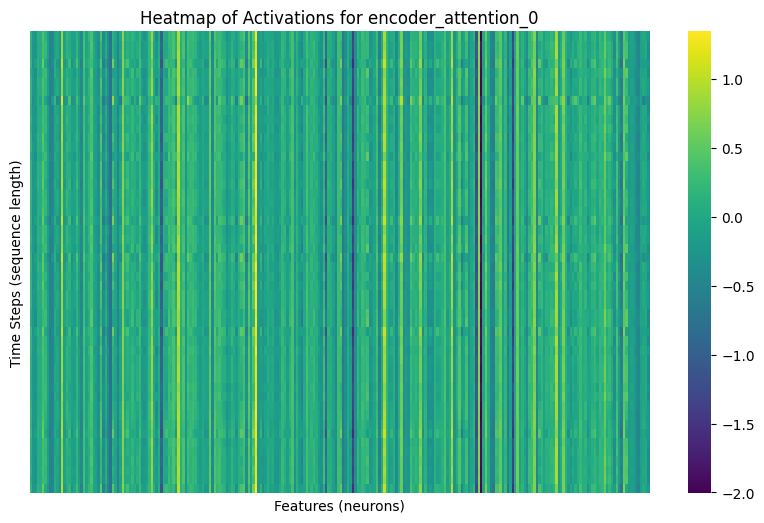

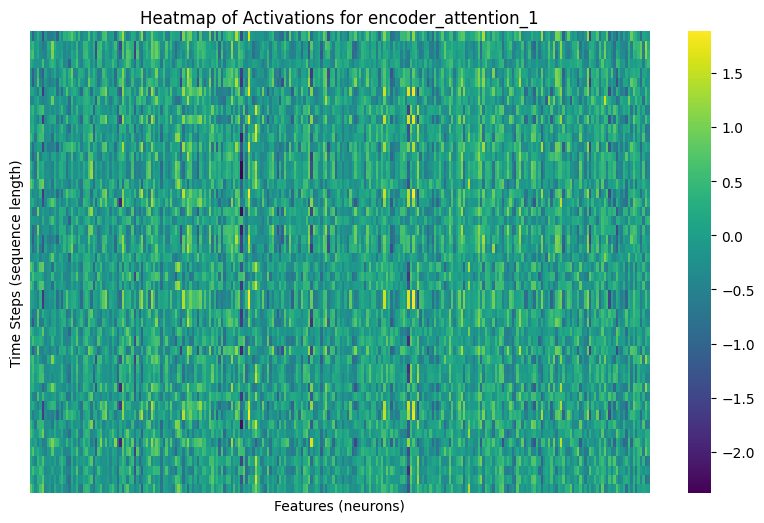

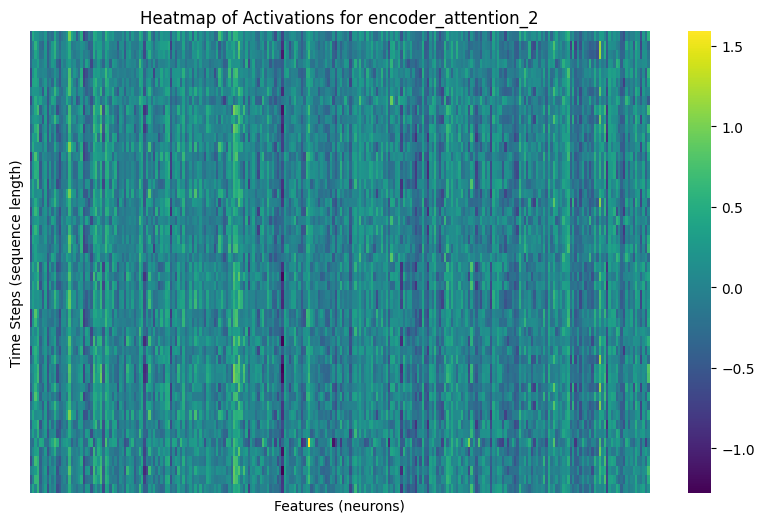

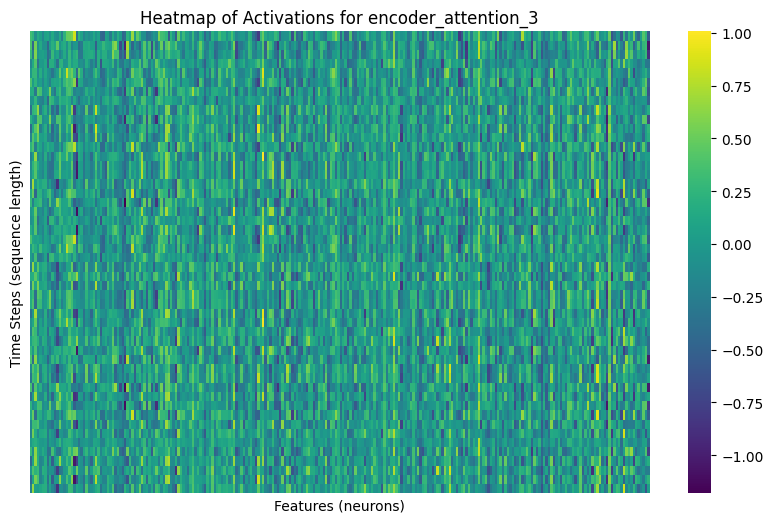

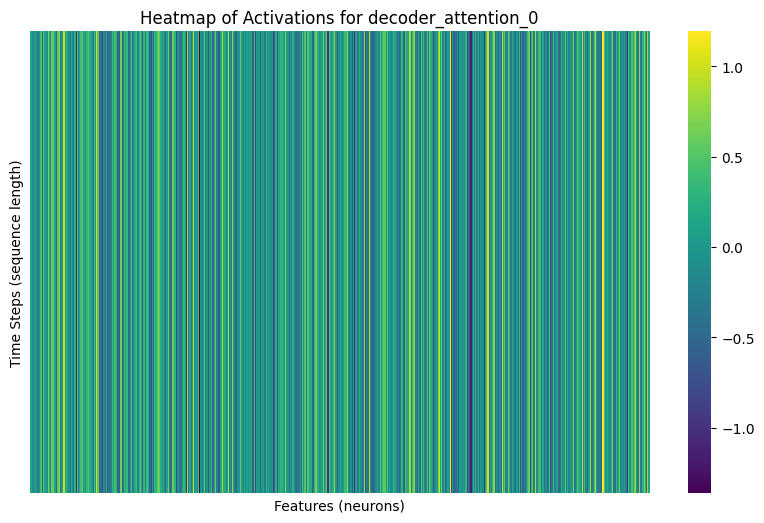

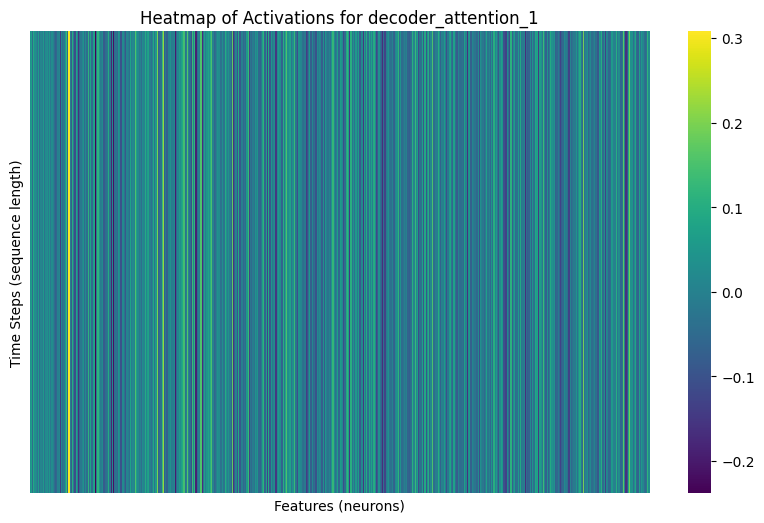

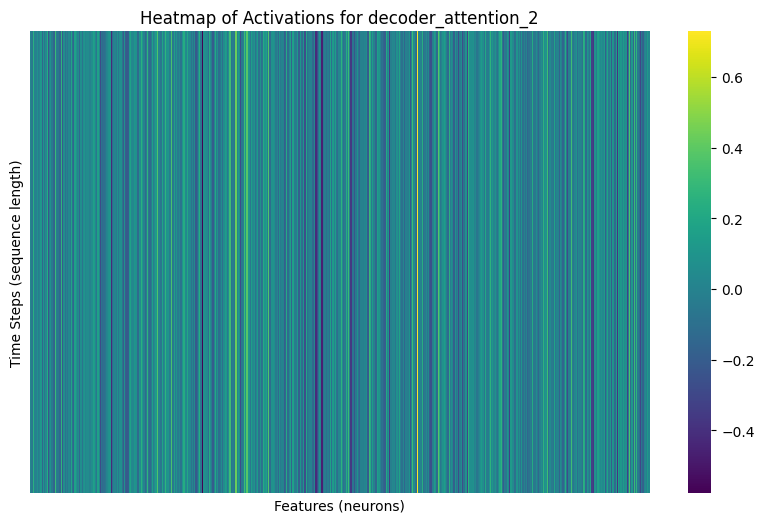

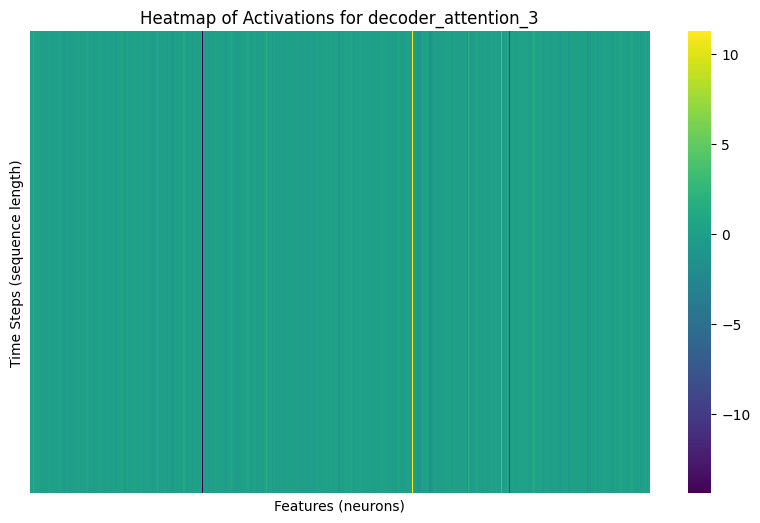

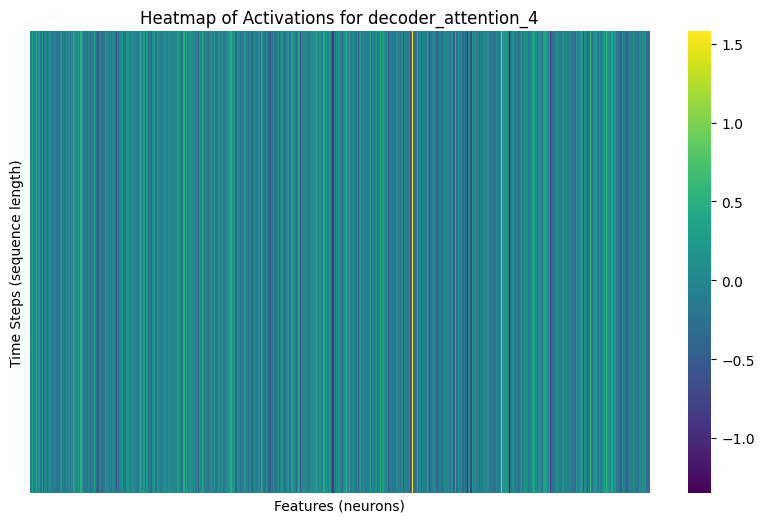

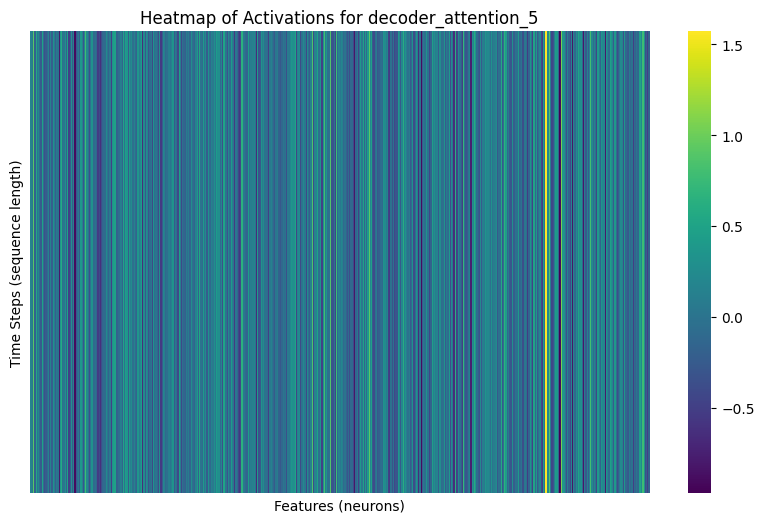

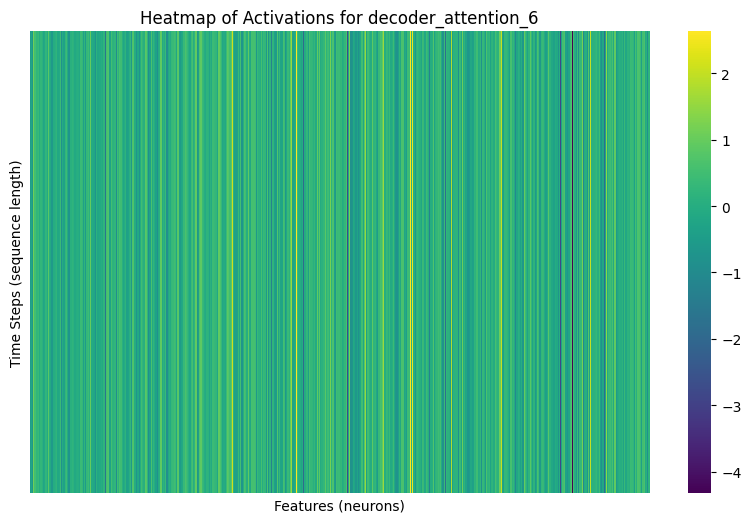

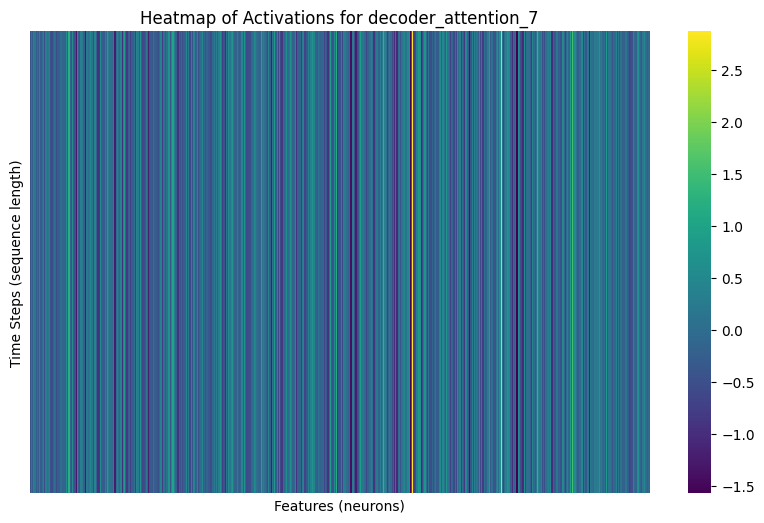

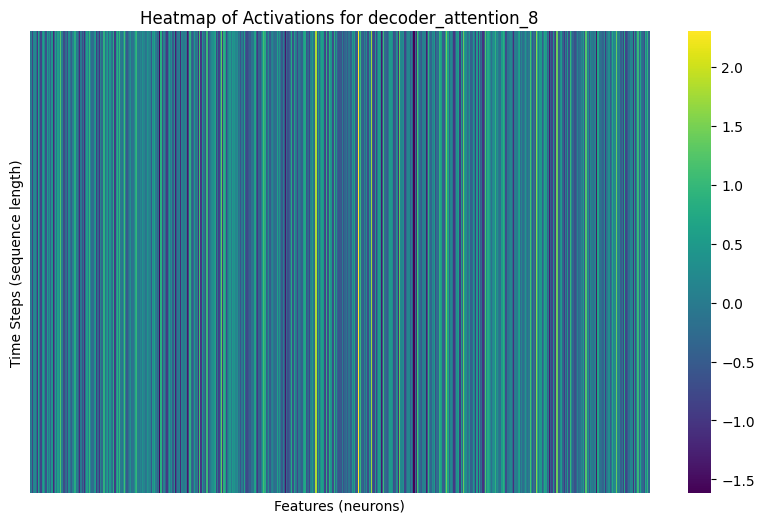

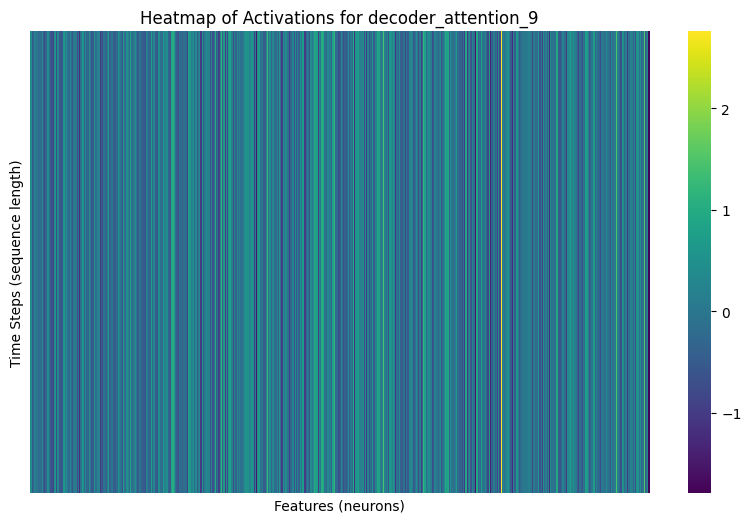

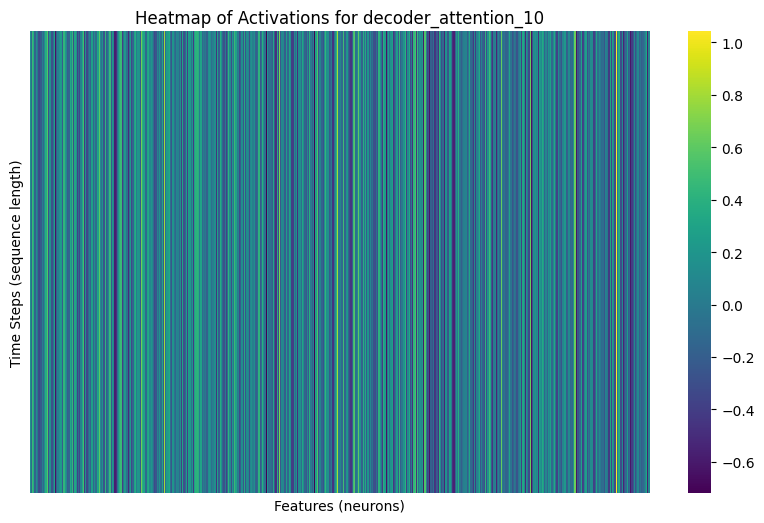

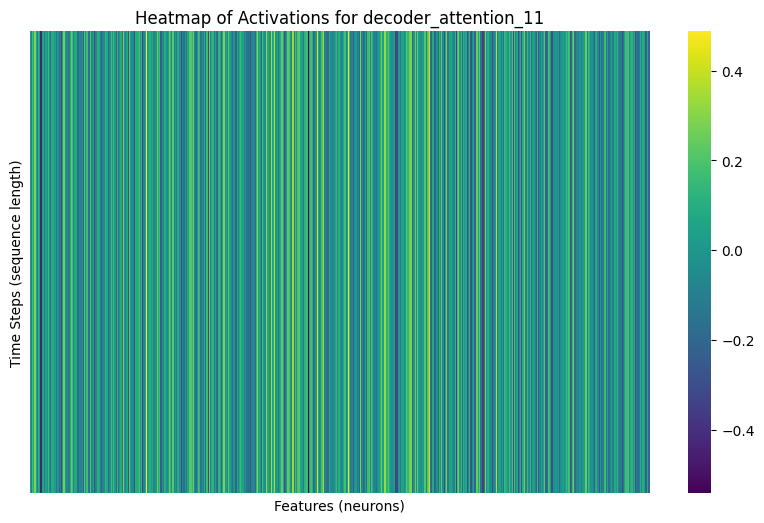

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# heatmaps for all attention layers in the encoder
for layer_name, output in layer_outputs.items():
    if "attention" in layer_name:
        activation_matrix = output[0].numpy()  # taking only first sample in the batch
        
        plt.figure(figsize=(10, 6))
        sns.heatmap(activation_matrix, cmap='viridis', cbar=True, xticklabels=False, yticklabels=False)
        plt.title(f"Heatmap of Activations for {layer_name}")
        plt.xlabel("Features (neurons)")
        plt.ylabel("Time Steps (sequence length)")
        plt.show()

In [32]:
import torch, json

# capturing logits using a hook for the final layer of the model
def logit_hook_fn(module, input, output):
    # Store the logits (raw predictions)
    logits = output.detach().cpu()
    return logits

# Registering a hook on the final layer to capture logits
final_layer = dstr.model.decoder.attentions[-1] # last layer
final_layer.register_forward_hook(logit_hook_fn)

with torch.no_grad():
    logits = dstr.fit(times, trajectory)

# output time
for i in logits[0]:
    print(i)

-0.3118 * x_0 + -1.9788 * x_1 | 0.5561 * x_0 + 0.3268 * x_1
-0.3118 * x_0 + -1.9955 * x_1 | 0.5587 * x_0 + 0.3268 * x_1
-0.3174 * x_0 + -2.0653 * x_1 | 0.5379 * x_0 + 0.3268 * x_1
-0.3148 * x_0 + -2.0653 * x_1 | 0.5443 * x_0 + 0.3326 * x_1
-0.3360 * x_0 + -2.0243 * x_1 | 0.5587 * x_0 + 0.3326 * x_1
-0.3259 * x_0 + -2.0653 * x_1 | 0.5438 * x_0 + 0.3268 * x_1
-0.3171 * x_0 + -2.0653 * x_1 | 0.5486 * x_0 + 0.3326 * x_1
-0.3174 * x_0 + -2.0653 * x_1 | 0.5486 * x_0 + 0.3268 * x_1
-0.2768 * x_0 + -2.0243 * x_1 | 0.2946 * x_1 + 0.5438 * x_0
-0.2947 * x_0 + -2.0653 * x_1 | 0.5417 * x_0 + 0.3138 * x_1
-0.2858 * x_0 + -1.9788 * x_1 | 0.2865 * x_1 + 0.5523 * x_0
-0.2703 * x_0 + -1.9788 * x_1 | 0.5502 * x_0 + 0.2962 * x_1
-0.2866 * x_0 + -1.9940 * x_1 | 0.5486 * x_0 + 0.2867 * x_1
-0.3051 * x_0 + -1.8954 * x_1 | 0.5935 * x_0 + 0.3158 * x_1
-0.3256 * x_0 + -1.8954 * x_1 | 0.5871 * x_0 + 0.3056 * x_1
-0.2971 * x_0 + -2.0653 * x_1 | 0.5438 * x_0 + 0.3065 * x_1
-0.2971 * x_0 + -2.0653 * x_1 | 0.5374 *